### Student Information
Name:李承翰

Student ID:311511043

GitHub ID: Louis208908

Kaggle name: HAIRYCRAB_OUO

Kaggle private scoreboard snapshot:

[Snapshot](../img/abc.jpg)

In [1]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lewis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
"""import library"""
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gensim
import tensorflow
import keras
from sklearn.metrics import confusion_matrix

%matplotlib inline


In [3]:
"""Check package installation"""

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.2.0
tensorflow: 2.10.0
keras: 2.10.0


In [4]:
"""Build datasets"""
### training data
anger_train = pd.read_csv("../dataset/lab2/data/semeval/train/anger-ratings-0to1.train.txt",
                        sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../dataset/lab2/data/semeval/train/sadness-ratings-0to1.train.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../dataset/lab2/data/semeval/train/fear-ratings-0to1.train.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../dataset/lab2/data/semeval/train/joy-ratings-0to1.train.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])


### testing data
anger_test = pd.read_csv("../dataset/lab2/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                        sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../dataset/lab2/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../dataset/lab2/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../dataset/lab2/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
"""shuffle dataset"""
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise1!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>
        Plot word frequency for Top 30 Words in train and test<p>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>

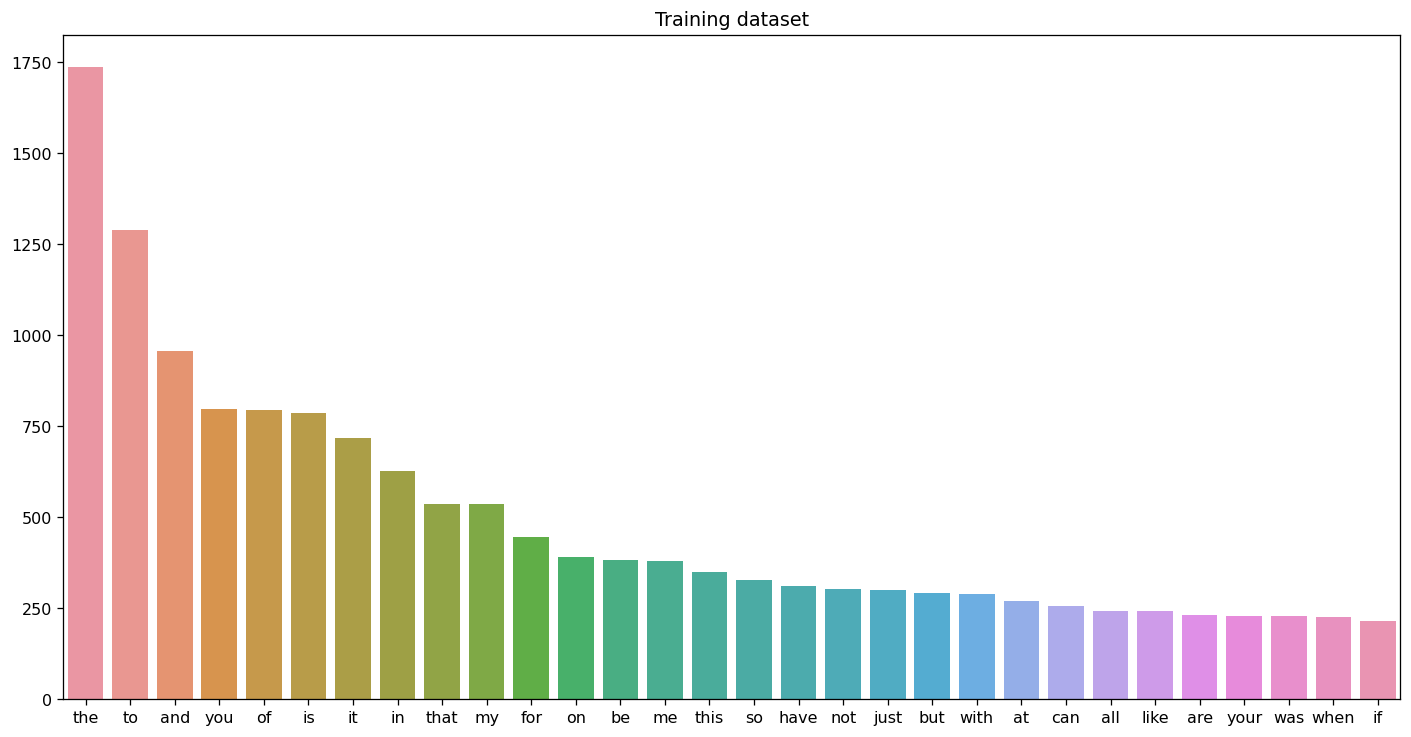

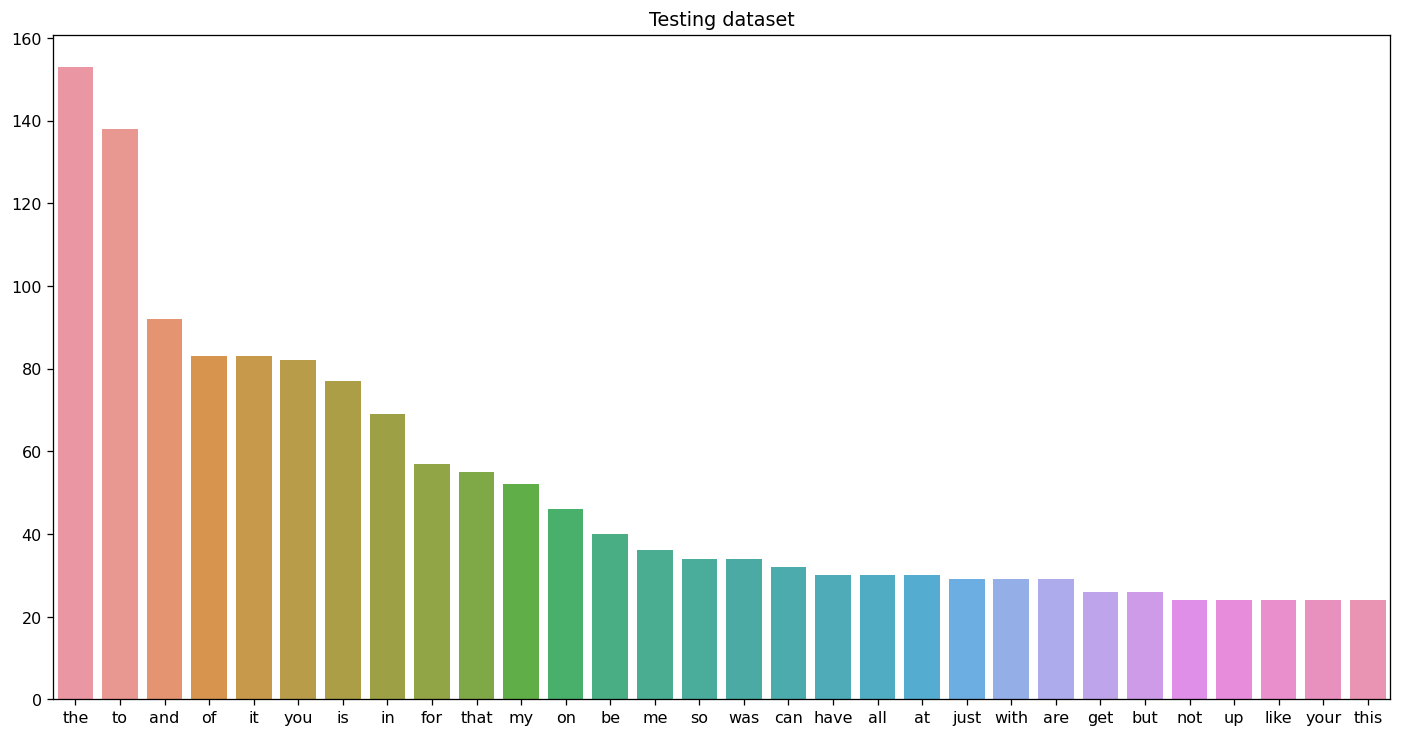

In [6]:
"""Ans of Ex.1"""
from sklearn.feature_extraction.text import CountVectorizer


count_vect = CountVectorizer()
#得到BOW之後轉成dataframe的形式，把頻率跟詞放到同一個表格當中，這樣只要直接sort整個表格就好
train_counts = count_vect.fit_transform(train_df.text) 
train_BOW = pd.DataFrame(train_counts.toarray(), columns=count_vect.get_feature_names_out())
test_counts = count_vect.fit_transform(test_df.text) 
test_BOW = pd.DataFrame(test_counts.toarray(), columns=count_vect.get_feature_names_out())

train_BOW_sorted = train_BOW.sum().sort_values(ascending = False)
test_BOW_sorted = test_BOW.sum().sort_values(ascending = False)


# dir(train_BOW_sorted)

plt.figure(figsize=(15, 7.5), dpi=115)
g = sns.barplot(x = train_BOW_sorted[:30].index, y = train_BOW_sorted[:30].values)
plt.title("Training dataset")
plt.show()

plt.figure(figsize=(15, 7.5), dpi=115)
g = sns.barplot(x = test_BOW_sorted[:30].index, y = test_BOW_sorted[:30].values)
plt.title("Testing dataset")
plt.show()


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise1!!!!!!!!!!!!!!!!!!!!!!!!<p>
                               Done<p>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>

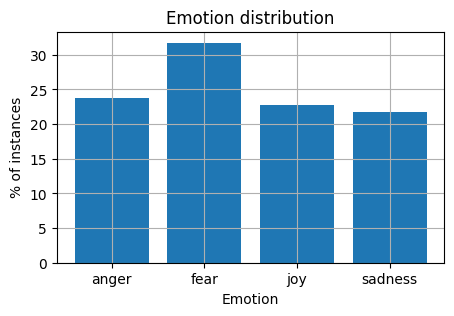

In [7]:
"""Find distribution of eacg emotion"""

# the histogram of the data
# 統計每個emotion的數量，算出各自的比例
labels = train_df['emotion'].unique()
post_amount = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_amount,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [8]:
"""Building BOW"""
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

# check the result
train_data_BOW_features

type(train_data_BOW_features)

# add .toarray() to show
train_data_BOW_features.toarray()

# check the dimension
train_data_BOW_features.shape

# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

"😂" in feature_names

False

In [9]:
"""Build another BOW"""
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
# 使用fit讓analyzer知道dataset當中有哪些詞，之後才可以用transform做出BOW
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

train_data_BOW_features_500.toarray()

# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

print("😂" in feature_names_500)

d:\學校資料\111上學期\資料探勘與應用\python_env\data_mining\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


True


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise2!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>
    TF-IDF vectorizer with 1000 features and show feature name<p>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>  

In [10]:
"""Ans of Ex.2"""
"""建立TD-IDF"""

import seaborn as sns
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer( max_features = 1000 , tokenizer=nltk.word_tokenize)

train_tf_idf = vectorizer.fit_transform(train_df.text)
vectorizer.get_feature_names_out()[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise2!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>
                                Done<p>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>

In [11]:
"""Building training/testing datasets"""
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [12]:
"""Building decision tree model"""
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'anger', 'joy', 'sadness', 'sadness', 'sadness', 'sadness',
       'sadness', 'sadness', 'anger'], dtype=object)

In [13]:
"""Counting accuracy"""
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.66


In [14]:
"""Utilizing libs for classification report"""
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.66      0.69      0.68       110
         joy       0.70      0.68      0.69        79
     sadness       0.65      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [15]:
"""Funciton for visualizing confusion_matrix"""
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise3!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>
                        Interpret the results<p>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>

confusion matrix可以讓我們知道針對特定某一個label的資料，他的預測結果怎麼樣
當prediction和ground truth標籤相同的那一格顏色越深時，就代表預測的結果越準確
那如果prediction都傾向於預測某一類型的label，我們也可以推測是否是資料數量有偏差

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise3!!!!!!!!!!!!!!!!!!!!!!!!!<p>
                                Done<p>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p> 

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise4!!!!!!!!!!!!!!!!!!!!!!!!!!<p>
#### Use Naive Bayes model to train it<p>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



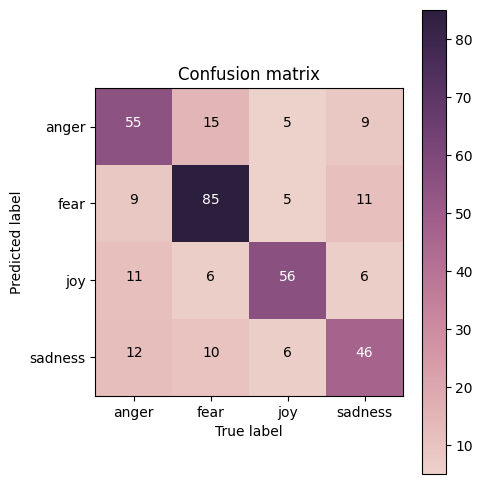

In [16]:
"""Ans of Ex.3"""
"""Bayes classifier"""
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report



"""MultinomialNB()"""
Y_train = train_df['emotion']
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predictResult = mnb.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=predictResult) 

my_tags = ['anger', 'fear', 'joy', 'sadness']
print(classification_report(y_true=y_test, y_pred=predictResult))
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise4!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>
                                Done<p>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise5!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>
#### Discuss the difference<p>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>

"""Answer of Ex.5"""<p>
比較了Decision tree 以及 Naive Bayes之後(以F1-score為基準)
可以發現在這次的例子當中Naive Bayes model的表現優於Decision tree
推測可能的原因是因為這次使用的資料全部都是互相獨立的


!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise5!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>
#### Done<p>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>

In [17]:
"""Deal with label (string -> one-hot)"""

"""把label從字串轉換成數字"""
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 69        anger
1080       fear
3008    sadness
2240        joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


C:\Users\lewis\AppData\Local\Temp\ipykernel_21456\2968632836.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print('y_train[0:4]:\n', y_train[0:4])


In [18]:
""" I/O dim check"""
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [19]:
"""Building deep learning model"""
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

In [20]:
"""Start training"""
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


d:\學校資料\111上學期\資料探勘與應用\python_env\data_mining\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 2s 6ms/step - loss: 1.3289 - accuracy: 0.3698 - val_loss: 1.2781 - val_accuracy: 0.4035
Epoch 2/25
113/113 [==============================] - 1s 6ms/step - loss: 1.0053 - accuracy: 0.6347 - val_loss: 0.8622 - val_accuracy: 0.6859
Epoch 3/25
113/113 [==============================] - 1s 5ms/step - loss: 0.5883 - accuracy: 0.7877 - val_loss: 0.7407 - val_accuracy: 0.7176
Epoch 4/25
113/113 [==============================] - 1s 6ms/step - loss: 0.4136 - accuracy: 0.8478 - val_loss: 0.7571 - val_accuracy: 0.6974
Epoch 5/25
113/113 [==============================] - 1s 6ms/step - loss: 0.3287 - accuracy: 0.8835 - val_loss: 0.8225 - val_accuracy: 0.6916
Epoch 6/25
113/113 [==============================] - 1s 5ms/step - loss: 0.2624 - accuracy: 0.9103 - val_loss: 0.8632 - val_accuracy: 0.6916
Epoch 7/25
113/113 [==============================] - 1s 5ms/step - loss: 0.2158 - accuracy: 0.9283 - val_loss: 0.9338 - val_accuracy: 0.6801
Epoch 8/25
113/11

In [21]:
"""Testing"""
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 4ms/step


array([[6.7576398e-03, 1.9980613e-02, 8.3073201e-03, 9.6495438e-01],
       [9.9904042e-01, 9.5887750e-04, 1.1877281e-11, 6.8657664e-07],
       [3.2865486e-01, 2.1687264e-03, 6.6891110e-01, 2.6531972e-04],
       [1.5454268e-03, 2.0940804e-05, 9.9804342e-01, 3.9023472e-04],
       [4.5388769e-03, 3.9916395e-04, 2.1005002e-05, 9.9504095e-01]],
      dtype=float32)

In [22]:
"""Convert one hot to string"""
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'anger', 'joy', 'joy', 'sadness'], dtype=object)

In [23]:
"""Let's take a look at the training log"""
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.369776,1.328940,0.403458,1.278139
1,1,0.634653,1.005290,0.685879,0.862227
2,2,0.787711,0.588302,0.717579,0.740743
3,3,0.847772,0.413590,0.697406,0.757054
4,4,0.883476,0.328740,0.691643,0.822531
5,5,0.910324,0.262447,0.691643,0.863209
6,6,0.928314,0.215831,0.680115,0.933830
7,7,0.941046,0.181635,0.680115,0.990061
8,8,0.951010,0.156695,0.668588,1.037734
9,9,0.958760,0.137287,0.674352,1.106544


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise6!!!!!!!!!!!!!!!!!!!!!!!!<p>
#### Plot training and validation log<p>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>

In [24]:
"""Ans of Ex.6"""

#就很單純的把資料從log裡面抓出來ouo
import plotly.express as px
fig = px.line(training_log,x ='epoch', y=['loss', 'val_loss'])
fig.show()
fig = px.line(training_log,x ='epoch', y=['accuracy', 'val_accuracy'])
fig.show()

!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise6!!!!!!!!!!!!!!!!!!!!!!!!!!<p>
#### Done<p>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>

In [25]:
"""Building Word2Vec"""
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))

"""顯示5筆資料"""
train_df[['id', 'text', 'text_tokenized']].head()

"""create the training corpus"""
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]



from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                        vector_size=vector_dim, window=window_size, 
                        min_count=min_count, epochs=training_epochs)

In [26]:
"""Get the corresponding vector of a word"""
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.3702107 ,  0.35868585,  0.35471344,  0.02193309, -0.47200045,
       -0.88978446,  0.84425354,  1.0635643 , -0.4518197 , -0.1504648 ,
       -0.52757263, -0.63498175, -0.6308951 ,  0.44844627, -0.14057972,
       -0.65993625,  0.30772018, -0.3315081 ,  0.08836111, -1.1319638 ,
        0.78917825,  0.83890516,  0.5912591 ,  0.5267002 ,  0.7531189 ,
        0.388033  , -0.71569264,  0.49882644, -0.24509193,  0.25988027,
       -0.05139739,  0.24812235,  0.588463  , -0.5214176 , -0.0309378 ,
        0.5468912 ,  0.22509891, -0.15727606, -0.4745547 , -0.6268641 ,
       -0.02471271, -0.07568833, -0.4513336 ,  0.12651367,  0.59626627,
       -0.76678437, -1.0571221 ,  0.5004838 ,  0.65853316,  0.42240173,
       -0.00254492, -0.9703178 ,  0.2695486 , -0.04530835, -0.52019846,
       -0.21316318,  0.49982443, -0.09756624,  0.3324916 ,  0.2941874 ,
       -0.14704402, -0.22032955,  0.8110765 ,  0.66155714, -0.5267125 ,
        0.8017011 ,  0.34566686,  0.9383937 , -1.4433738 ,  0.54

In [27]:
"""Get the most similar words"""
word = 'happy'
#表示找出10個最相似ㄉ
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('.\\nA', 0.9144726395606995),
 ('Makes', 0.9144300818443298),
 ('help', 0.9133658409118652),
 ('establishment', 0.9062556624412537),
 ('birthday', 0.903663158416748),
 ('Online', 0.9002114534378052),
 ('smile', 0.9001128673553467),
 ('liked', 0.8986609578132629),
 ('Be', 0.8968085646629333),
 ('travel', 0.8967800140380859)]

In [28]:
"""Using pretrained model"""
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../pretrained/lab2/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [36]:
"""Get pretrained model by api"""
import gensim.downloader as api

# ## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
# import ssl
# import urllib.request
# ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

load ok


[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise7!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>
        What if our input data is a sentence(Sequential input)<p>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>

Answer of Ex.7<p>
只要使用處理sequential的模型即可，例如各式各樣的RNN、LSTM、GRU

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise7!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>
                                Done<p>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>

In [37]:
"""Clustering target"""
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]


from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


In [31]:
"""Check cluster membership"""
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [32]:
"""Check cluster membership"""
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [33]:
"""Prepare visualizing target"""
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


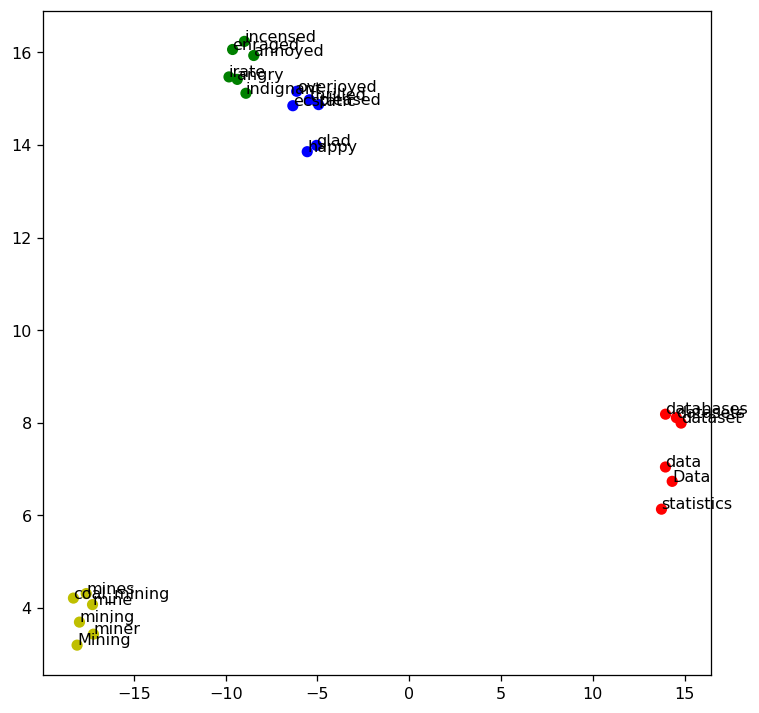

In [34]:
"""Plot using t-SNE"""

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

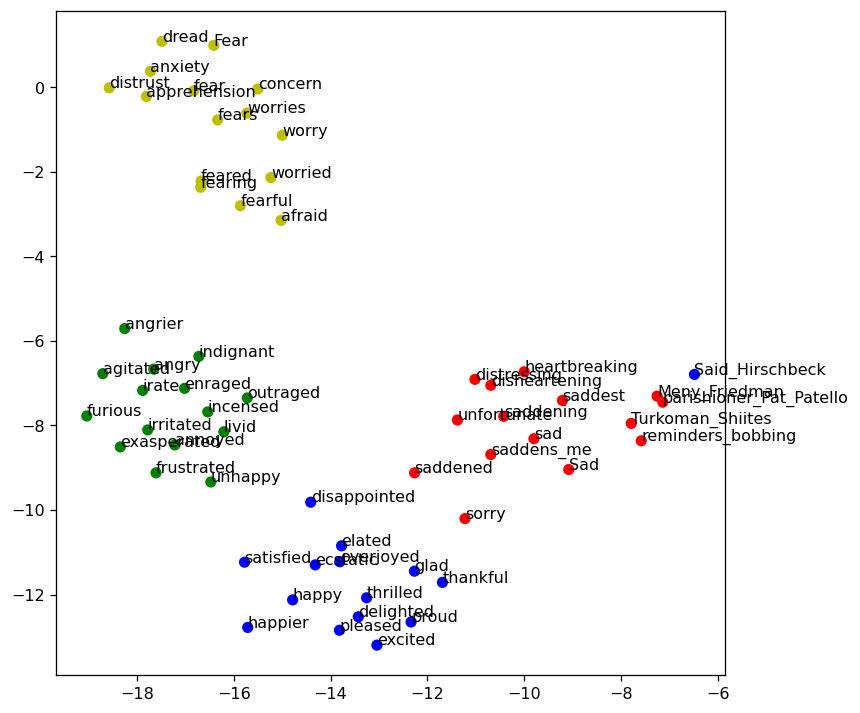

In [35]:
"""Ans of Ex.8"""

# 14 + word itself = 15?
topn = 14
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
target_words = happy_words + angry_words + sad_words + fear_words

size = 200
# len = 4 * (1 + 14) = 60
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!Exercise8!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>
                                Done<p>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<p>